In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
from scipy.spatial.distance import cdist

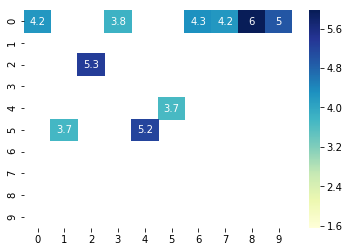

In [52]:
# sns.heatmap(cdist(np.random.randn(10, 5), np.random.randn(10, 5)), cmap=sns.cubehelix_palette(as_cmap=True))
# sns.heatmap(cdist(np.random.randn(10, 5), np.random.randn(10, 5)), cmap="YlGnBu")
distances = cdist(np.random.randn(10, 5), np.random.randn(10, 5))
dist_df = pd.DataFrame(distances)
cutoff = dist_df.quantile(q=0.9)
mask_arr = dist_df < cutoff
sns.heatmap(distances, mask = mask_arr, cmap="YlGnBu", annot=True)

TODO
# Pre-Grouping of Data

When working in a particular counter-terrorism context, it is natural to ask whether data from completely different circumstances is useful. Why, after all, should we think that terrorist attack data from Nigeria is useful in predicting attacks in the UK? 

In light of this, we will try to divide the dataset into chunks, so that an algorithm which seeks to predict 

1. Grouping by attribute, such as region or weapon type. 

2. Grouping by clustering, after applying a clustering algorithm to the points in $\mathbb{R}^{n}$.

## Affinity Along Attributes

We will first group the data by attribute, and then calculate pairwise distances from the means of each group. For example, there are 12 regions in the dataset. If we divide the 

In [1]:
from preprocess_functions import load_data_relevant_cols, get_dummies

In [2]:
raw = load_data_relevant_cols()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
traits_to_compare = ['region_txt', 'targtype1_txt', 'weaptype1_txt', 
                     'iyear', 'nkill', 'natlty1_txt']
dummies = get_dummies(raw, traits_to_compare)

In [91]:
def plot_affinity_heatmap(trait_str, colormap='ocean', percentile_cutoff = 0.2): 
    trait_labels = [label for label in dummies.columns.values if trait_str in label]
    means = []
    for label in trait_labels: 
        means.append(np.mean(dummies[dummies[label] == 1]).drop(index=trait_labels))
    plt.figure(figsize=(12, 8))
    plot_labels = [label.replace(trait_str, '') for label in trait_labels]
    distance_matrix = cdist(means, means)
    dist_df = pd.DataFrame(distance_matrix)
    cutoff = dist_df.quantile(q=percentile_cutoff)
    mask_arr = dist_df > cutoff 
    for i in range(len(mask_arr)): 
        for j in range(i + 1): 
            mask_arr[i][j] = True 
    sns.heatmap(cdist(means, means), cmap=colormap, xticklabels=plot_labels, 
                yticklabels=plot_labels, annot=True, mask=mask_arr)
    plt.title('Affinity of mean terrorist attacks: Top {} Percent'.format(int(percentile_cutoff * 100)))

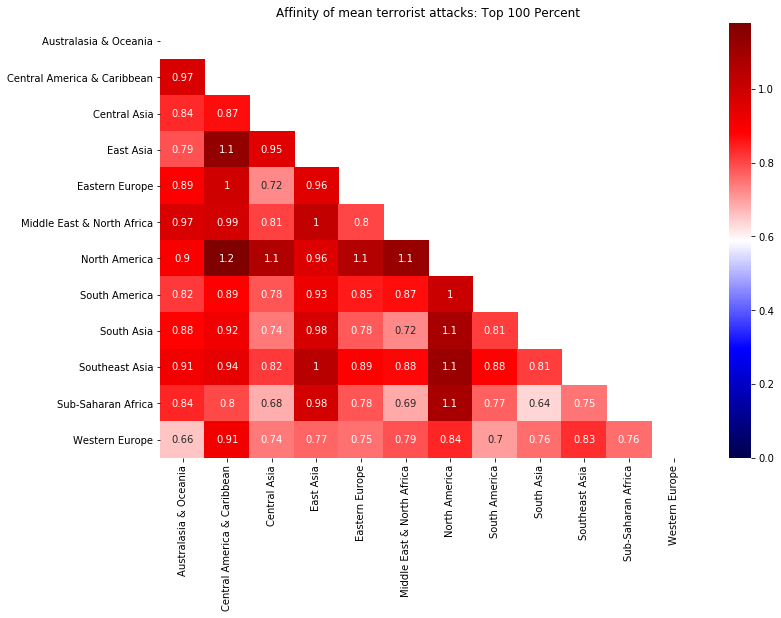

In [97]:
plot_affinity_heatmap('region_txt_', colormap='seismic', percentile_cutoff=1.0)

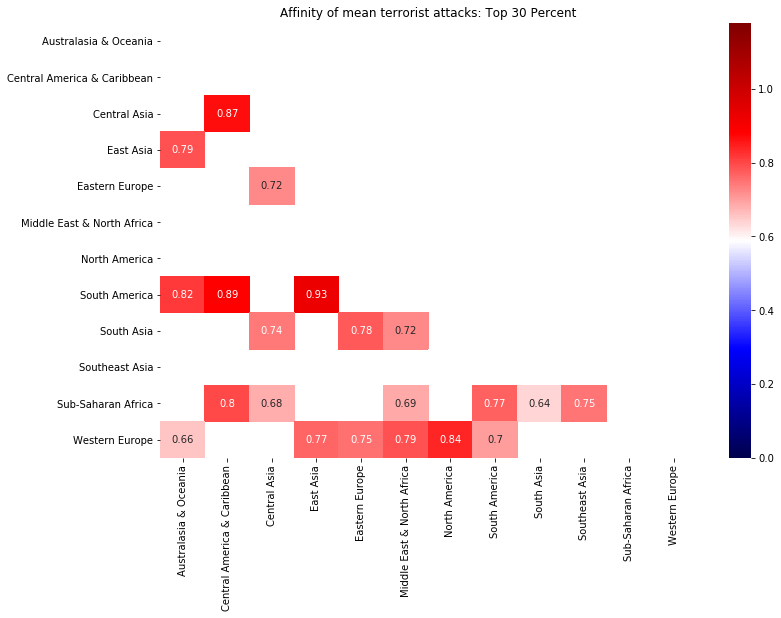

In [98]:
plot_affinity_heatmap('region_txt_', colormap='seismic', percentile_cutoff=0.3)

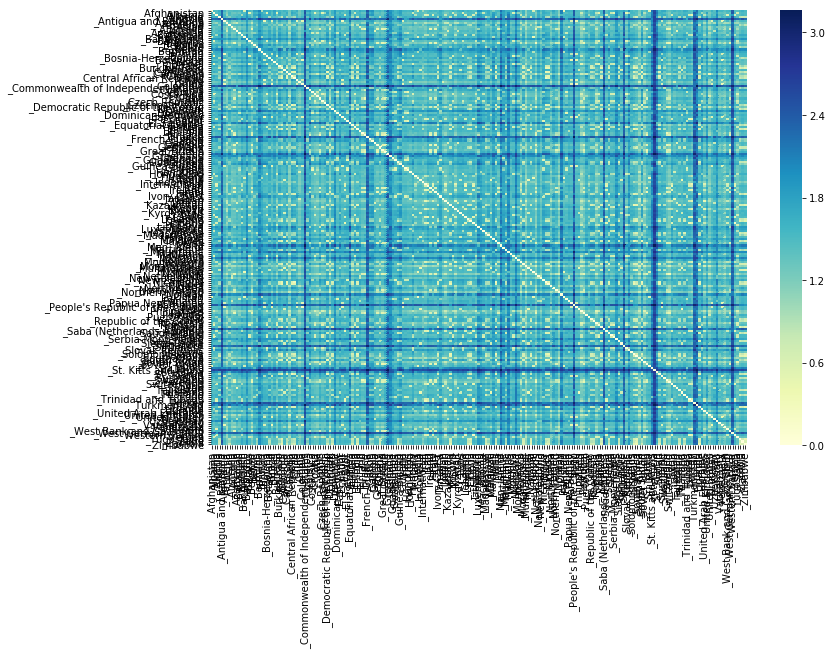

In [35]:
plot_affinity_heatmap('weaptype1_txt')

'1995.0'

In [ ]:
# todo: 
'''1. Preprocess the data so that it scales uniformly. Remember sqrt(2) rule 
2. k-means
3. normal clustering (DB-SCAN because of sparsity?)
4. SVM
5. k-nearest neighbors 
6. sensitivity analysis'''